# Perturbation analysis for highest expressing gene - Fig S12

# Load simulation data

In [1]:
%%time
%load_ext autoreload

from analysis_utils import *
from joblib import Parallel, delayed
import multiprocessing  
import numpy as np
import pandas as pd

#Growth rate = 3.0
#Computes the translation latencies from our model with simulations containing
#1 to 14 cognate ternary complexes in the voxel (14 to 42 not included because
#the probability of voxels with that number of cognates is ~0)
path = "./data/"
ensmbl_latency_dict = dict()
rxndiff=dict()
scalingFactor = 200
NR_scaledrates = {'k1r':718*200/scalingFactor,'k2f':1475*200/scalingFactor,'k2r_nr':1120*200/scalingFactor,'k3_nr':6*200/scalingFactor,'k4':209*200/scalingFactor}


data = "191003_2210/"
for i in range(1,7):
    sim_i = computeTransportRxnTimes(path+data,100*(i-1),100*(i-1)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor,NR_scaling = NR_scaledrates)
    ensmbl_latency_dict[i] = (CellLatencies(sim_i))

data = "191105_0908/"
for i in range(7,14):
    sim_i = computeTransportRxnTimes(path+data, 100*(i-1-6),100*(i-1-6)+100,cogtRNANum=i, ribosomeNum = 7,scaling=scalingFactor,NR_scaling = NR_scaledrates)
    ensmbl_latency_dict[i] = (CellLatencies(sim_i))
    
#Experimentally obtained codon usage frequencies and tRNA abundances at growth rate = 2.5 dbl/hr
gr25_Codon = np.array([2.36, 1.26, 45.55, 34.17, 16.97, 57.86, 19.27, 33.74, 14.98, 22.31, 43.18, 7.67, 24.11, 24.87, 39.49, 11.81, 0.03, 0.63, 2.19, 9.31, 17.22, 55.01, 5.61, 29.21, 21.67, 0.52, 15.79, 43.86, 4.17, 2.61, 20.64, 26.7, 7.03, 0.19, 2.76, 3.81, 6.72, 16.52, 4.27, 2.73, 7.92, 23.25, 2.51, 1.98, 16.33, 11.68, 0.62, 0.67, 43.82, 20.59, 27.28, 7.01, 6.78, 14.21, 60.75, 0.82, 3.86, 4.09, 28.82, 5.18, 4.38, 1.09])
gr25_pCodon = gr25_Codon/np.sum(gr25_Codon)
gr25_ptRNA = [0.0602409638554217, 0.010542168674698798, 0.07379518072289158, 0.00602409638554217, 0.010542168674698798, 0.00602409638554217, 0.021084337349397596, 0.043674698795180725, 0.021084337349397596, 0.01204819277108434, 0.01807228915662651, 0.08433734939759038, 0.03162650602409639, 0.07228915662650603, 0.01204819277108434, 0.07078313253012049, 0.06325301204819278, 0.01656626506024097, 0.009036144578313254, 0.027108433734939763, 0.010542168674698798, 0.03012048192771085, 0.013554216867469882, 0.015060240963855425, 0.0075301204819277125, 0.010542168674698798, 0.0075301204819277125, 0.003012048192771085, 0.021084337349397596, 0.004518072289156627, 0.01656626506024097, 0.01204819277108434, 0.0015060240963855425, 0.009036144578313254, 0.01656626506024097, 0.019578313253012052, 0.015060240963855425, 0.027108434, 0.05873493975903616, 0.019578313]
gr25_ptRNA = gr25_ptRNA/np.sum(gr25_ptRNA)

Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
Computing...
CPU times: user 8.63 s, sys: 2.36 s, total: 11 s
Wall time: 8.31 s


## Load original GA-discovered distribution

Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'insJK', 'insAB4', 'insEF2', 'insAB6']
Unique transcripts without a Gene identifier:  0
Sequences not available for # genes in Ecocyc DB:  0
Inconsistency in codons:  0
1
Missing genes in transcriptome_dict in compute_transcript_distributions:  3553
[0.07679412681130282, 0.08523592085132133, 0.08088572005747867, 0.08180197092640702, 0.08523592085132133, 0.024062229334562812, 0.07363719360634789, 0.040615551926959516, 0.035132466359930684, 0.03579538533589475, 0.017223565954440627, 0.053854319214231366, 0.04806219930807657, 0.00607268937513586, 0.0821727727872197, 0.009173707392039838, 0.01509233546229588, 0.012879400346772974, 0.007925944541951644, 0.00858326753920192, 0.008341315073

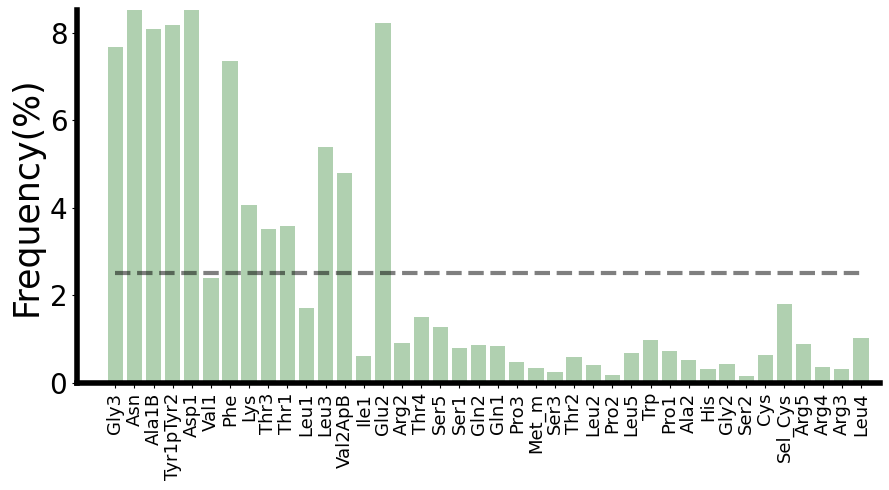

In [2]:
tRNA_tags = ["Ala1B", "Ala2", "Arg2", "Arg3", "Arg4", "Arg5", "Asn", "Asp1", "Cys", "Gln1", "Gln2", \
"Glu2", "Gly2", "Gly3", "His", "Ile1", "Leu1", "Leu2", "Leu3", "Leu4", "Leu5", "Lys", \
"Met_m", "Phe", "Pro1", "Pro2", "Pro3", "Sel_Cys", "Ser1", "Ser2", "Ser3", "Ser5", "Thr1", \
"Thr2", "Thr3", "Thr4", "Trp", "Tyr1pTyr2", "Val1", "Val2ApB"]
codon_tags = ['GGG', 'GGA', 'GGU', 'GGC', 'GAG', 'GAA', 'GAU', 'GAC', 'GUG', 'GUA', 'GUU', 'GUC', 'GCG', 'GCA', 'GCU', 'GCC', 'AGG', 'AGA', 'AGU', 'AGC', 'AAG', 'AAA', 'AAU', 'AAC', 'AUG', 'AUA', 'AUU', 'AUC', 'ACG', 'ACA', 'ACU', 'ACC', 'UGG', 'UGA', 'UGU', 'UGC', 'UAU', 'UAC', 'UUG', 'UUA', 'UUU', 'UUC', 'UCG', 'UCA', 'UCU', 'UCC', 'CGG', 'CGA', 'CGU', 'CGC', 'CAG', 'CAA', 'CAU', 'CAC', 'CUG', 'CUA', 'CUU', 'CUC', 'CCG', 'CCA', 'CCU', 'CCC']

#Load elongation rate per codon
codon_elongt = compute_codon_elongt(gr25_ptRNA, len(gr25_pCodon), ensmbl_latency_dict)
gene_map,gene_latency = compute_gene_elongt(codon_elongt,stratify='highest')
pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map,gene_latency)
pCodon_WT = np.array(pCodon_transcriptome)

ptRNA_dict, pcodon_dict, codon_dict, codonLabels, pCodon, tRNA_dict = cognateDistrib(gr25_ptRNA,pCodon_transcriptome,extra2=True)
codon_sorted_indices = np.flip(pCodon.argsort())
pCodon_sorted = pCodon[codon_sorted_indices]
codon_sorted = codonLabels[codon_sorted_indices]

#Sort tRNA by codon usage in transcriptome and plot baseline tRNA frequency
tRNA_sum_dict = tRNA_dict.copy()
tRNA_weightedbycodon = list()
for keys in tRNA_dict.keys():
    tRNA_sum_dict[keys] = (sum([pcodon_dict[tRNA_key] for tRNA_key in tRNA_dict[keys]]))
tRNA_weightedbycodon = list(tRNA_sum_dict.values())/sum(tRNA_sum_dict.values())
tRNA_sorted_indices = np.flip(tRNA_weightedbycodon.argsort())
tRNA_sorted = np.array(tRNA_tags)[tRNA_sorted_indices]
ptRNA_sorted = gr25_ptRNA[tRNA_sorted_indices]

#Resort ptRNA_min and plot
ptRNA_list_fast=np.load('./data/UniformRandomtRNA_WTCodonUsage_stratifyhighest_2ksample_fasttRNA_ptRNA.npy')
elongt_list_fast =np.load('./data/UniformRandomtRNA_WTCodonUsage_stratifyhighest_2ksample_fasttRNA_elongt.npy')

ptRNA_min = ptRNA_list_fast[np.argmin(elongt_list_fast)]
ptRNA_min_dict = dict(zip(tRNA_tags,ptRNA_min))
ptRNA_min_sorted=[ptRNA_min_dict[tRNA] for tRNA in tRNA_sorted]
fig,ax = plt.subplots(figsize=(9,5))
#ax.bar(np.arange(40),ptRNA_sorted,color='#39568CFF',width=0.8,alpha=0.5)
ax.bar(np.arange(40),np.array(ptRNA_min_sorted)*100,color='darkseagreen',width=0.8,alpha=0.7)
ax.plot(np.arange(40),[1/40*100]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlim(-2,40)
ax.set_ylabel('Frequency(%)',fontsize=25)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=13)
ax.set_ylim(0,8.52)

plt.tight_layout()
print(ptRNA_min_sorted)
fig.savefig('./Figures/S12b.svg', dpi=300,bbox_inches='tight')

# Generate Datasets -- only run once to generate data

## Generate corresponding pCodon list


In [3]:
%%time
ensmbl_latency_dict_list = np.load('./data/ensmbl_latency_dict_list10.npy',allow_pickle=True)

pCodon_WT_list = []
for i,ensmbl_latency_dict in enumerate(ensmbl_latency_dict_list):
    print(i)
    codon_elongt = compute_codon_elongt(gr25_ptRNA, len(gr25_pCodon), ensmbl_latency_dict)
    gene_map,gene_latency = compute_gene_elongt(codon_elongt,stratify='highest')
    pCodon_transcriptome, transcriptome_elongt = compute_transcript_distributions(gene_map,gene_latency)
    pCodon_WT = np.array(pCodon_transcriptome)
    pCodon_WT_list.append(pCodon_WT)
np.save('./data/pCodon_highestgene_list10',pCodon_WT_list)

0
Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'insJK', 'insAB4', 'insEF2', 'insAB6']
Unique transcripts without a Gene identifier:  0
Sequences not available for # genes in Ecocyc DB:  0
Inconsistency in codons:  0
1
Missing genes in transcriptome_dict in compute_transcript_distributions:  3553
1
Number of polypeptides reported:  4434
Returned gene map of length  15934
Removed  24  non-divisible by three genes
['insAB1', 'insCD2', 'dgd', 'insCD4', 'insCD6', 'alaB', 'prfB', 'supK', 'b2891', 'ECK2886', 'insCD3', 'insEF4', 'insAB2', 'insEF5', 'insCD1', 'insAB5', 'insEF1', 'insCD5', 'insEF3', 'insAB3', 'insJK', 'insAB4', 'insEF2', 'insAB6']
Unique transcripts without a Gene identifier:  0
Sequences not available for # genes in Eco

## Generate a baseline

In [4]:
%%time
baseline = perturb(ptRNA_min, tRNA_tags, tRNA_sorted,pCodon_WT,ensmbl_latency_dict,1,0,pCodon_type='highest')
np.save('./data/highestgene-SinglePerturb_n10m300_baseline_elongt',baseline[0])
np.save('./data/highestgene-SinglePerturb_n10m300_baseline_ptRNA_sorted',baseline[1])
np.save('./data/highestgene-SinglePerturb_n10m300_baseline_elongt_sem',baseline[2])

replicates run:  3000
CPU times: user 31.3 s, sys: 1.02 s, total: 32.3 s
Wall time: 4min 21s


## Single perturbation pairwise analysis

Figure S12


Takes in the original fastest performing tRNA distribution, then goes in codon-abundance weighted tRNA rank order starting from the second most-weighted tRNA doing the following:
1. If the given tRNA has more relative abundance than the immediately previous higher rank order bar (e.g., first tRNA if we're currently evaluating the second tRNA), then set the relative abundance to be 10% lower than the previous bar and add the removed relative abundance to the previous bar. [If check prior: if 10% higher on the previous bar is above 0.0852, set the bar to be 0.0852 and the current bar to be reduced by the delta increase] 
2. Evaluate the updated elongation latency
3. Reset to the original fastest distribution and go to the next tRNA

In [8]:
elongt_perturb = []
ptRNA_perturb = []
elongt_perturb_sem = []
baseline_elongt = np.load('./data/highestgene-SinglePerturb_n10m300_baseline_elongt.npy')
for i in range(1,len(tRNA_tags)):
    values = perturb(ptRNA_min, tRNA_tags, tRNA_sorted,pCodon_WT,ensmbl_latency_dict,i,10,pCodon_type='highest')
    elongt_perturb.append(values[0])
    ptRNA_perturb.append(values[1])
    elongt_perturb_sem.append(values[2])
    print(i)

print(elongt_perturb - baseline_elongt)

ptRNA_dict = dict(zip(tRNA_tags,ptRNA_perturb[5]))
ptRNA_sorted_perturb =[ptRNA_dict[tRNA] for tRNA in tRNA_sorted]
print(ptRNA_sorted_perturb)

np.save('./data/highestgene-SinglePerturb_n10m300_ptRNA_sorted_perturb',ptRNA_sorted_perturb)
np.save('./data/highestgene-SinglePerturb_n10m300_elongt_perturb',elongt_perturb)
np.save('./data/highestgene-SinglePerturb_n10m300_elongt_perturb_sem',elongt_perturb_sem)

replicates run:  3000
1
replicates run:  3000
2
replicates run:  3000
3
replicates run:  3000
4
replicates run:  3000
5
replicates run:  3000
6
replicates run:  3000
7
replicates run:  3000
8
replicates run:  3000
9
replicates run:  3000
10
replicates run:  3000
11
replicates run:  3000
12
replicates run:  3000
13
replicates run:  3000
14
replicates run:  3000
15
replicates run:  3000
16
replicates run:  3000
17
replicates run:  3000
18
replicates run:  3000
19
replicates run:  3000
20
replicates run:  3000
21
replicates run:  3000
22
replicates run:  3000
23
replicates run:  3000
24
replicates run:  3000
25
replicates run:  3000
26
replicates run:  3000
27
replicates run:  3000
28
replicates run:  3000
29
replicates run:  3000
30
replicates run:  3000
31
replicates run:  3000
32
replicates run:  3000
33
replicates run:  3000
34
replicates run:  3000
35
replicates run:  3000
36
replicates run:  3000
37
replicates run:  3000
38
replicates run:  3000
39
[-0.03865918  0.3949533   0.365322

## Monotonicity algorithm: multiple iterations of sequential additive tRNA perturbations

Shifting abundance mass towards monotonicity.
Future work: Can also modify such that the algorithm doesn't touch isoforms (e.g., Leu1, Leu3.

Figure S12

In [3]:
baseline_elongt = np.load('./data/highestgene-SinglePerturb_n10m300_baseline_elongt.npy')
baseline_ptRNA = np.load('./data/highestgene-SinglePerturb_n10m300_baseline_ptRNA_sorted.npy')


elongt_perturb = []
elongt_perturb_sem = []
ptRNA_perturb = []

ptRNA_min_update = ptRNA_min.copy()
mono_perturb = []
count=0

ptRNA_sorted_perturb_iter = baseline_ptRNA.copy()
print(ptRNA_min_update)

monotonic = False

values = perturb(ptRNA_min_update, tRNA_tags, tRNA_sorted,pCodon_WT,ensmbl_latency_dict,i,0, pCodon_type='highest')
ptRNA_dict = dict(zip(tRNA_tags,values[1]))
ptRNA_sorted_perturb_iter =[ptRNA_dict[tRNA] for tRNA in tRNA_sorted]
mono_perturb.append(monotonicity(ptRNA_sorted_perturb_iter))
elongt_perturb.append(baseline_elongt.item())

while (not monotonic):
    count+=1
    for i in range(1,len(tRNA_tags)):
        if i <(len(tRNA_tags)-1):
            values = perturb(ptRNA_min_update, tRNA_tags, tRNA_sorted,pCodon_WT,ensmbl_latency_dict,i,10,skip=True, pCodon_type='highest')
        else:
            values = perturb(ptRNA_min_update, tRNA_tags, tRNA_sorted,pCodon_WT,ensmbl_latency_dict,i,10, pCodon_type='highest')
        ptRNA_min_update = values[1]
    elongt_perturb.append(values[0])
    elongt_perturb_sem.append(values[2])
    ptRNA_dict = dict(zip(tRNA_tags,values[1]))
    ptRNA_sorted_perturb_iter =[ptRNA_dict[tRNA] for tRNA in tRNA_sorted]
    mono_perturb.append(monotonicity(ptRNA_sorted_perturb_iter))
    ptRNA_perturb.append(ptRNA_sorted_perturb_iter)
    print("iter: ", count, " monotonicity: ", monotonicity(ptRNA_sorted_perturb_iter), "elongt: ",elongt_perturb[-1] )
    print(ptRNA_sorted_perturb_iter)
    if monotonicity(ptRNA_sorted_perturb_iter) == 100:
        monotonic = True

print(elongt_perturb)
print(elongt_perturb - baseline_elongt)

np.save('./data/highestgene-IterativeSequentialAdditive-Monotonicity_n10m300_ptRNA_perturb',ptRNA_perturb)
np.save('./data/highestgene-IterativeSequentialAdditive-Monotonicity_n10m300_elongt_perturb',elongt_perturb)
np.save('./data/highestgene-IterativeSequentialAdditive-Monotonicity_n10m300_elongt_perturb_sem',elongt_perturb_sem)
np.save('./data/highestgene-IterativeSequentialAdditive-Monotonicity_n10m300_mono_perturb',mono_perturb)

[0.08088572 0.00532297 0.00917371 0.00328306 0.00355354 0.00890304
 0.08523592 0.08523592 0.0064131  0.00834132 0.00858327 0.08217277
 0.0043546  0.07679413 0.00319594 0.00607269 0.01722357 0.0041019
 0.05385432 0.01020014 0.0069119  0.04061555 0.00335868 0.07363719
 0.00729577 0.00180699 0.00483428 0.01804502 0.00792594 0.0015431
 0.00255616 0.0128794  0.03579539 0.00601138 0.03513247 0.01509234
 0.00973043 0.08180197 0.02406223 0.0480622 ]
replicates run:  3000
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates r

replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  3000
iter:  6  monotonicity:  82.05128205128204 elongt:  165.6474681099679
[0.08523592085132133, 0.08523592085132133, 0.0796704424069228, 0.07159756234365178, 0.06375298800736551, 0.05681180294825257, 0.051458806970015675, 

replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  3000
iter:  11  monotonicity:  84.61538461538461 elongt:  165.98858903261132
[0.08523592085132133, 0.08523592085132133, 0.07796712294201946, 0.07062014171965039, 0.06410951139671155, 0.05848322894572564, 0.05367509054598864

replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  11
replicates run:  3000
iter:  16  monotonicity:  92.3076923076923 elongt:  166.1701822161027
[0.08523592085132133, 0.08523592085132133, 0.07797648844967472, 0.07102158949910478, 0.06481376283493341, 0.059260903818829765, 0.05425271339441777,

# Plotting (can modify below)

# Single perturbation analysis plotting (Fig S12)


show [0.         0.         0.24100907 0.2229279  0.22336616 0.5082402
 0.2116797  0.06553302 0.25251807 0.22808266 0.32350407 0.57303892
 0.23097648 0.50265963 0.         0.14399957 0.2079894  0.24814255
 0.2308067  0.22667506 0.22335403 0.23063944 0.24017847 0.23253527
 0.2430113  0.2431157  0.24002108 0.23810598 0.23660142 0.21580336
 0.22545056 0.22190102 0.22450431 0.23167403 0.22867849 0.24369694
 0.23490902 0.23327111 0.24425636 0.23247956]


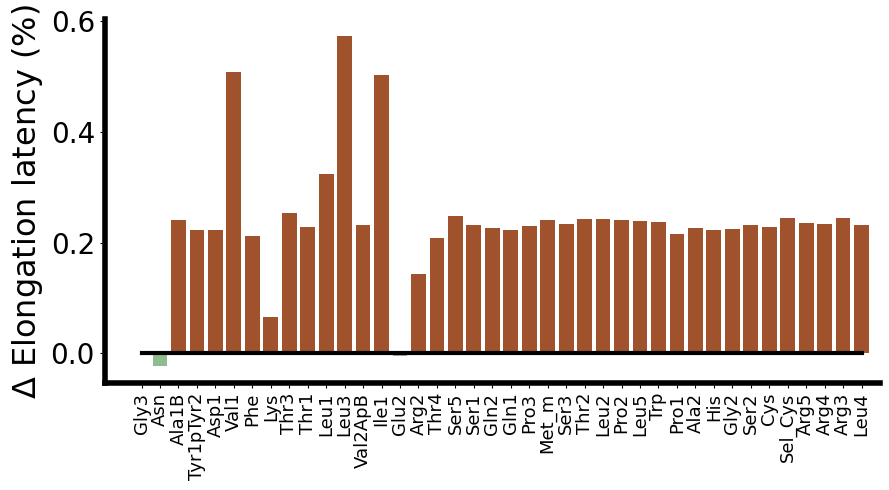

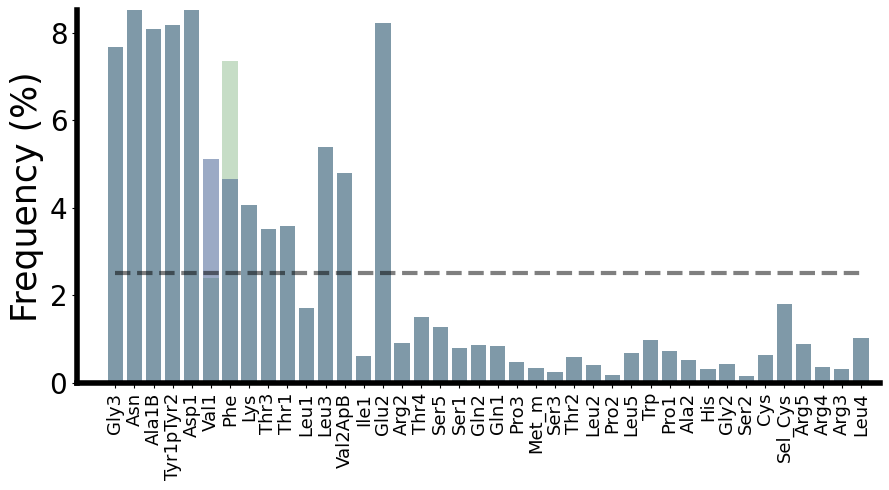

In [21]:
ptRNA_sorted_perturb = np.load('./data/highestgene-SinglePerturb_n10m300_ptRNA_sorted_perturb.npy')
elongt_perturb=np.load('./data/highestgene-SinglePerturb_n10m300_elongt_perturb.npy')
elongt_perturb_sem = np.load('./data/highestgene-SinglePerturb_n10m300_elongt_perturb_sem.npy')
baseline_elongt = np.load('./data/highestgene-SinglePerturb_n10m300_baseline_elongt.npy')
baseline_elongt_sem = np.load('./data/highestgene-SinglePerturb_n10m300_baseline_elongt_sem.npy')

#Plotting
fig,ax = plt.subplots(figsize=(9,5))
elongt_diff = (elongt_perturb - baseline_elongt)/baseline_elongt*100
elongt_diff[elongt_diff<0] = 0
elongt_diff=np.insert(elongt_diff,0,0)
print("show", elongt_diff)
ax.bar(np.arange(40),elongt_diff,color='sienna',width=0.8)

elongt_diff = (elongt_perturb - baseline_elongt)/baseline_elongt*100
elongt_diff[elongt_diff>0] = 0
elongt_diff=np.insert(elongt_diff,0,0)
elongt_diff_sem = elongt_perturb_sem
elongt_diff_sem = np.insert(elongt_diff_sem,0,0)
ax.bar(np.arange(40),elongt_diff,color='darkseagreen',width=0.8)
ax.plot(np.arange(40),[0]*40,color='black',linewidth=3,alpha=1)
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlim(-2,40)
ax.set_ylabel('$\Delta$ Elongation latency (%)',fontsize=23)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=13)
#ax.set_ylim(-5,5)
plt.tight_layout()
fig.savefig('./Figures/S12e.svg', dpi=300,bbox_inches='tight')

#Resort ptRNA_min and plot
ptRNA_list_fast=np.load('./data/UniformRandomtRNA_WTCodonUsage_stratifyhighest_2ksample_fasttRNA_ptRNA.npy')
elongt_list_fast =np.load('./data/UniformRandomtRNA_WTCodonUsage_stratifyhighest_2ksample_fasttRNA_elongt.npy')

ptRNA_min = ptRNA_list_fast[np.argmin(elongt_list_fast)]
ptRNA_min_dict = dict(zip(tRNA_tags,ptRNA_min))
ptRNA_min_sorted=[ptRNA_min_dict[tRNA] for tRNA in tRNA_sorted]

fig,ax = plt.subplots(figsize=(9,5))
#ax.bar(np.arange(40),ptRNA_sorted,color='#39568CFF',width=0.8,alpha=0.5)
ax.bar(np.arange(40),np.array(ptRNA_min_sorted)*100,color='darkseagreen',width=0.8,alpha=0.5)
ax.bar(np.arange(40),ptRNA_sorted_perturb*100,color='#39568CFF',width=0.8,alpha=0.5)
ax.plot(np.arange(40),[1/40*100]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlim(-2,40)
ax.set_ylabel('Frequency (%)',fontsize=25)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=13)
ax.set_ylim(0,8.52)

plt.tight_layout()
fig.savefig('./Figures/S12d.svg', dpi=300,bbox_inches='tight')

## Check if rational modification of distribution improves elongation latency

In [6]:
ptRNA_min_glu2toLys = ptRNA_min.copy()
ptRNA_min_glu2toLys[21] = 0.040615551926959516+0.04
ptRNA_min_glu2toLys[11] = 0.0821727727872197 - 0.04
elongt_perturb = perturb(ptRNA_min_glu2toLys, tRNA_tags, tRNA_sorted,pCodon_WT,ensmbl_latency_dict,1,0,pCodon_type='highest')[0]
elongt_diff = (elongt_perturb - baseline_elongt)/baseline_elongt*100
print(elongt_diff)

start
replicates run:  3000
-0.5560442658780547


## Check internal noise of simulation

In [24]:
baseline_elongt = np.load('./data/highestgene-SinglePerturb_n10m300_baseline_elongt.npy')

noise_baseline = []
for i in range(30):
    elongt_perturb = perturb(ptRNA_min, tRNA_tags, tRNA_sorted,pCodon_WT,ensmbl_latency_dict,1,0,pCodon_type='highest')[0]
    elongt_diff = (elongt_perturb - baseline_elongt)/baseline_elongt*100
    noise_baseline.append(elongt_diff)
print(noise_baseline)
print(np.average(noise_baseline))
print(np.std(noise_baseline))

replicates run:  3000
replicates run:  3000
replicates run:  3000
replicates run:  3000
replicates run:  3000
replicates run:  3000
replicates run:  3000
replicates run:  3000
replicates run:  3000
replicates run:  3000
replicates run:  3000


KeyboardInterrupt: 

In [26]:
print(noise_baseline)
print(np.average(noise_baseline))
print(np.std(noise_baseline))

[-0.015377272544350395, -0.020035852736789827, -0.019352135358302977, -0.030839042051163293, -0.021991279053696133, -0.017059775720176463, -0.002159466838650531, -0.012166086899431041, -0.01168320226427036, -0.01831668227386318, -0.022354348990984516]
-0.017394104066516248
0.00696999020020521


## Monotonicity plot: Figure S12

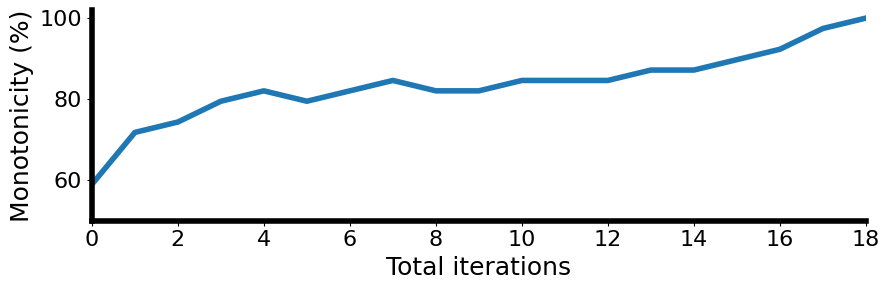

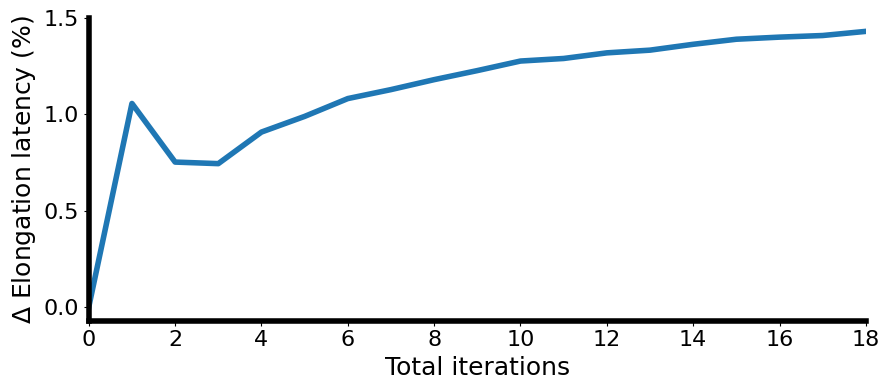

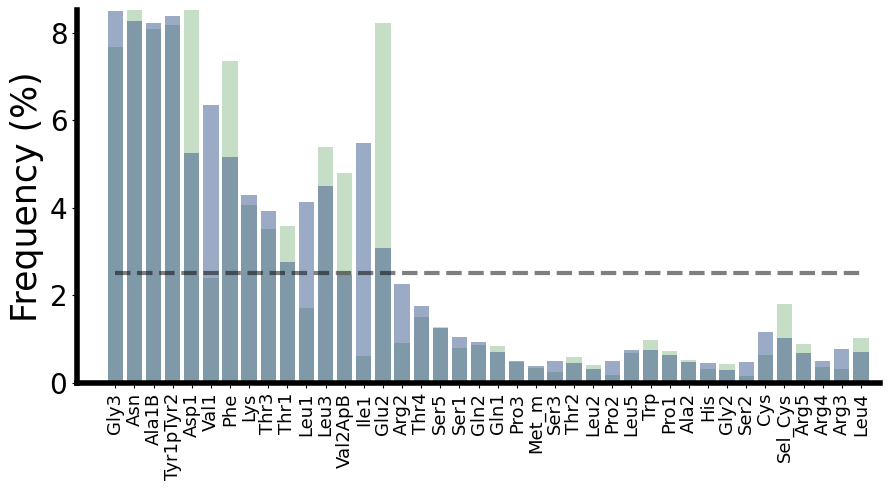

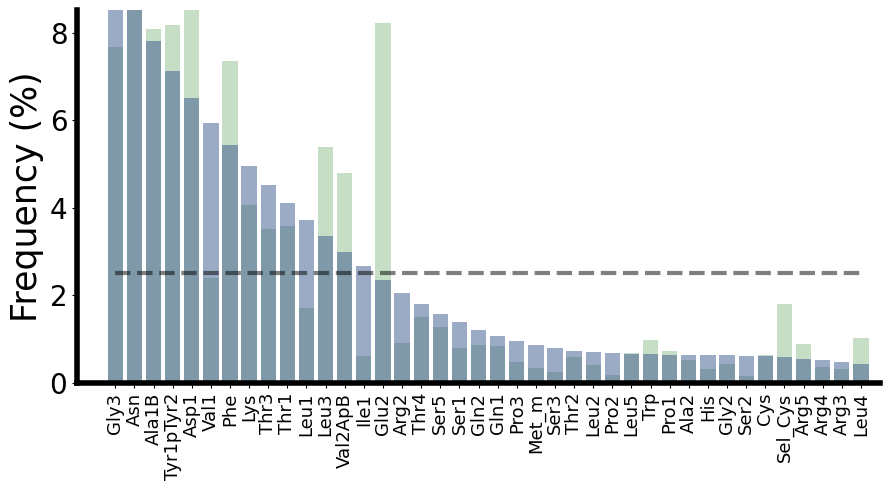

In [6]:
ptRNA_perturb=np.load('./data/highestgene-IterativeSequentialAdditive-Monotonicity_n10m300_ptRNA_perturb.npy')
elongt_perturb=np.load('./data/highestgene-IterativeSequentialAdditive-Monotonicity_n10m300_elongt_perturb.npy')
baseline_elongt=np.load('./data/highestgene-IterativeSequentialAdditive-Monotonicity_n10m300_baseline_elongt.npy')
mono_perturb=np.load('./data/highestgene-IterativeSequentialAdditive-Monotonicity_n10m300_mono_perturb.npy')

fig,ax = plt.subplots(figsize=(9,3))

ax.plot(np.arange(len(mono_perturb)),mono_perturb,linewidth=4)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)

ax.set_ylabel('Monotonicity (%)',fontsize=18)
ax.set_xlabel('Total iterations',fontsize=18)

ax.tick_params(axis='y', which='major', labelsize=16)
ax.tick_params(axis='x', which='major', labelsize=16)
ax.set_ylim(50,102)
ax.set_xlim(0,18)

plt.tight_layout()
fig.savefig('./Figures/S12g.svg', dpi=300,bbox_inches='tight')

#Elongation latency % plot
fig,ax = plt.subplots(figsize=(9,4))
ax.plot(np.arange(len(elongt_perturb)),(elongt_perturb-baseline_elongt)/baseline_elongt*100,linewidth=4)
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlim(0,18)

ax.set_ylabel('$\Delta$ Elongation latency (%)',fontsize=18)
ax.set_xlabel('Total iterations',fontsize=18)

ax.tick_params(axis='y', which='major', labelsize=16)
ax.tick_params(axis='x', which='major', labelsize=16)

plt.tight_layout()
fig.savefig('./Figures/S12h.svg', dpi=300,bbox_inches='tight')


#Resort ptRNA_min and plot - plot iter 0
ptRNA_list_fast=np.load('./data/UniformRandomtRNA_WTCodonUsage_stratifyhighest_2ksample_fasttRNA_ptRNA.npy')
elongt_list_fast =np.load('./data/UniformRandomtRNA_WTCodonUsage_stratifyhighest_2ksample_fasttRNA_elongt.npy')

ptRNA_min = ptRNA_list_fast[np.argmin(elongt_list_fast)]
ptRNA_min_dict = dict(zip(tRNA_tags,ptRNA_min))
ptRNA_min_sorted=[ptRNA_min_dict[tRNA] for tRNA in tRNA_sorted]
fig,ax = plt.subplots(figsize=(9,5))
ax.bar(np.arange(40),np.array(ptRNA_min_sorted)*100,color='darkseagreen',width=0.8,alpha=0.5)
ax.bar(np.arange(40),ptRNA_perturb[0]*100,color='#39568CFF',width=0.8,alpha=0.5)
ax.plot(np.arange(40),[1/40*100]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlim(-2,40)
ax.set_ylabel('Frequency (%)',fontsize=25)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=13)
ax.set_ylim(0,8.52)
plt.tight_layout()

#Resort ptRNA_min and plot - plot final iter
ptRNA_list_fast=np.load('./data/UniformRandomtRNA_WTCodonUsage_stratifyhighest_2ksample_fasttRNA_ptRNA.npy')
elongt_list_fast =np.load('./data/UniformRandomtRNA_WTCodonUsage_stratifyhighest_2ksample_fasttRNA_elongt.npy')

ptRNA_min = ptRNA_list_fast[np.argmin(elongt_list_fast)]
ptRNA_min_dict = dict(zip(tRNA_tags,ptRNA_min))
ptRNA_min_sorted=[ptRNA_min_dict[tRNA] for tRNA in tRNA_sorted]
fig,ax = plt.subplots(figsize=(9,5))
ax.bar(np.arange(40),np.array(ptRNA_min_sorted)*100,color='darkseagreen',width=0.8,alpha=0.5)
ax.bar(np.arange(40),ptRNA_perturb[-1]*100,color='#39568CFF',width=0.8,alpha=0.5)
ax.plot(np.arange(40),[1/40*100]*40,color='black',linewidth=3,linestyle='dashed',alpha=0.5)
plt.xticks(range(len(tRNA_tags)), tRNA_sorted,rotation='vertical')

ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['top'].set_linewidth(0)
ax.spines['right'].set_linewidth(0)
ax.set_xlim(-2,40)
ax.set_ylabel('Frequency (%)',fontsize=25)
ax.tick_params(axis='y', which='major', labelsize=20)
ax.tick_params(axis='x', which='major', labelsize=13)
ax.set_ylim(0,8.52)
plt.tight_layout()
fig.savefig('./Figures/S12f.svg', dpi=300,bbox_inches='tight')